In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'Schrodinger1D_Stationary'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

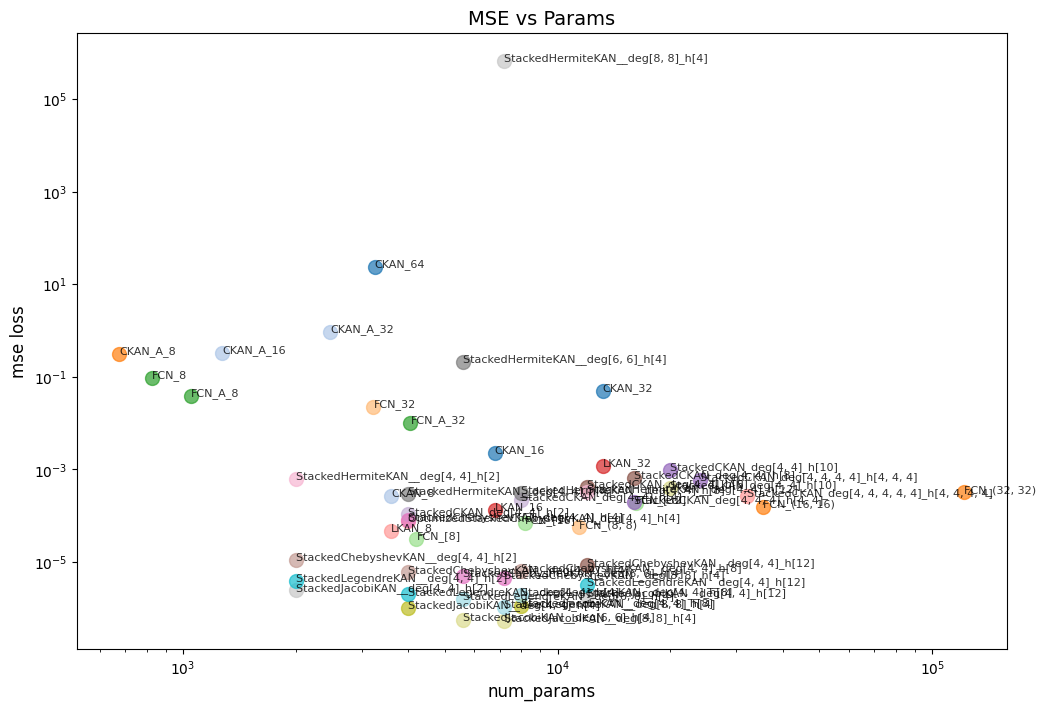

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

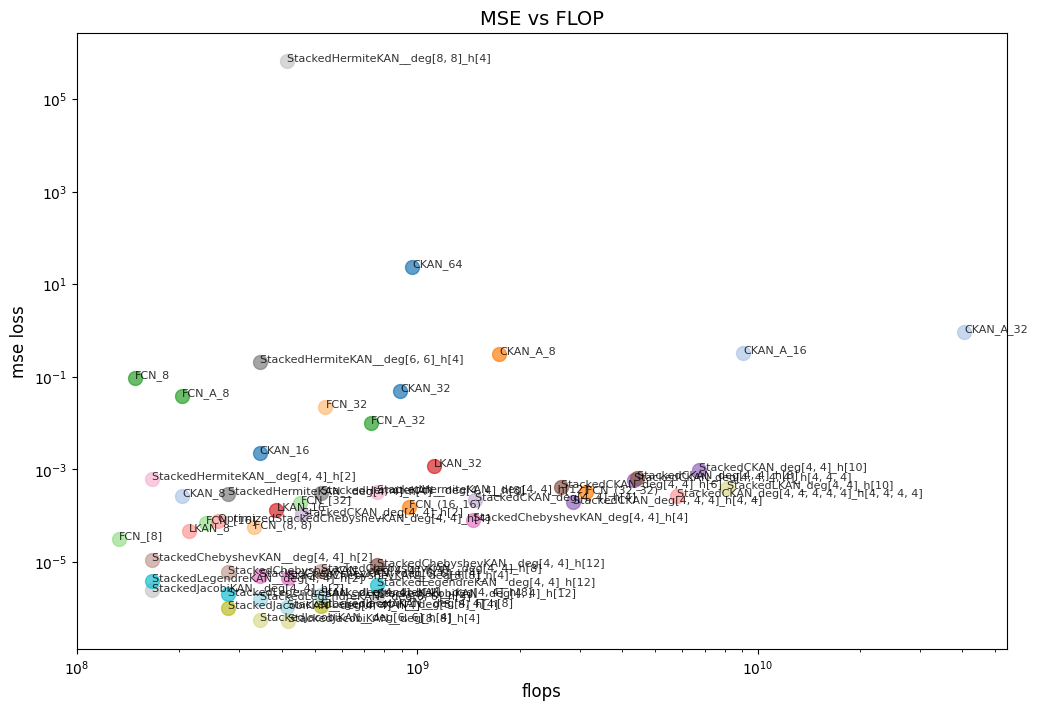

In [5]:
analyser.plot_mse_over_flops()

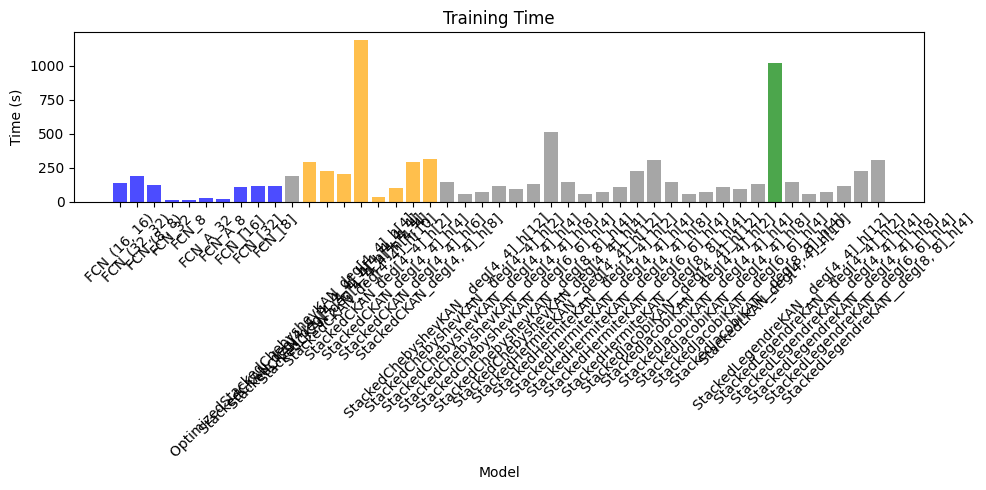

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

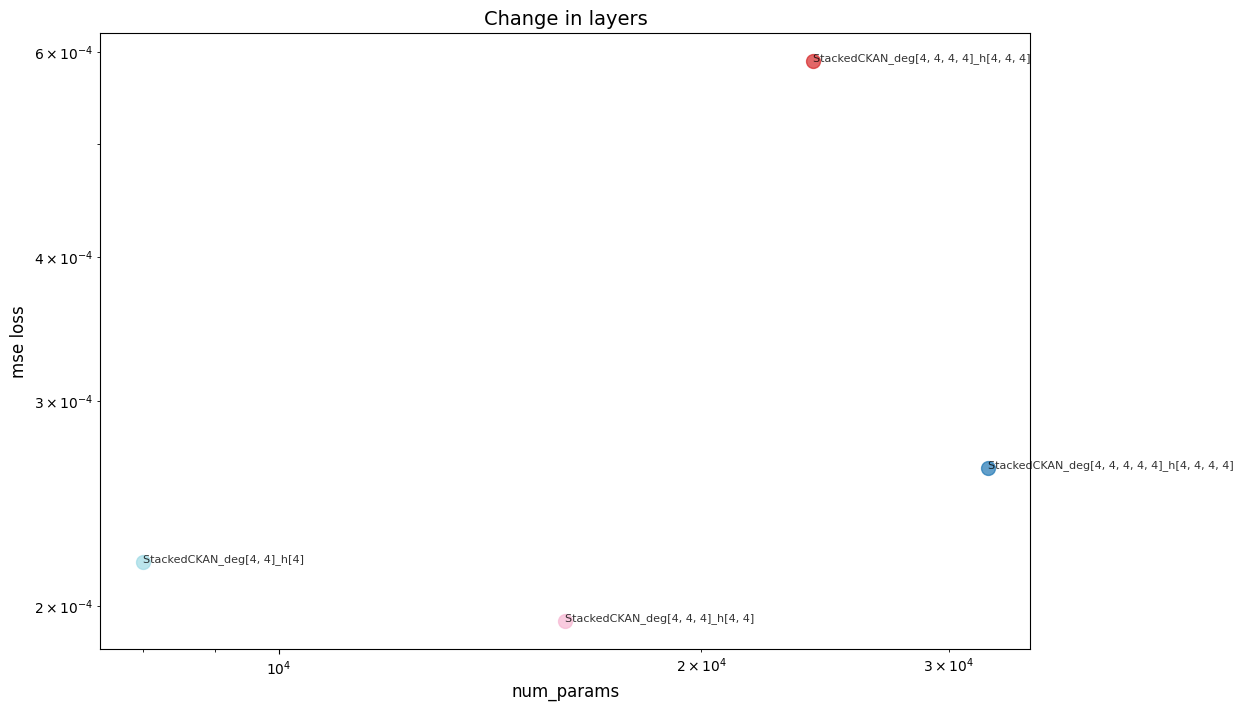

In [7]:
analyser.plot_mse_over_params(filter=lambda x: re.match('StackedCKAN_deg[4[, 4]*]_h[4[, 4]*]', x), title='Change in layers') #(Optimized)*

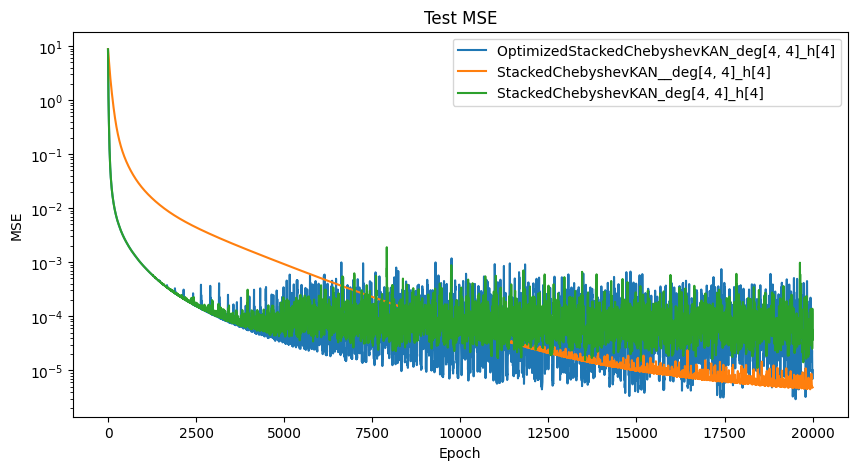

In [8]:
l1 = [
    'StackedChebyshevKAN__deg[4, 4]_h[4]',
    'StackedChebyshevKAN_deg[4, 4]_h[4]',
    'OptimizedStackedChebyshevKAN_deg[4, 4]_h[4]'
]
analyser.plot_mses(filter=lambda x: x in l1)

<Figure size 700x700 with 0 Axes>

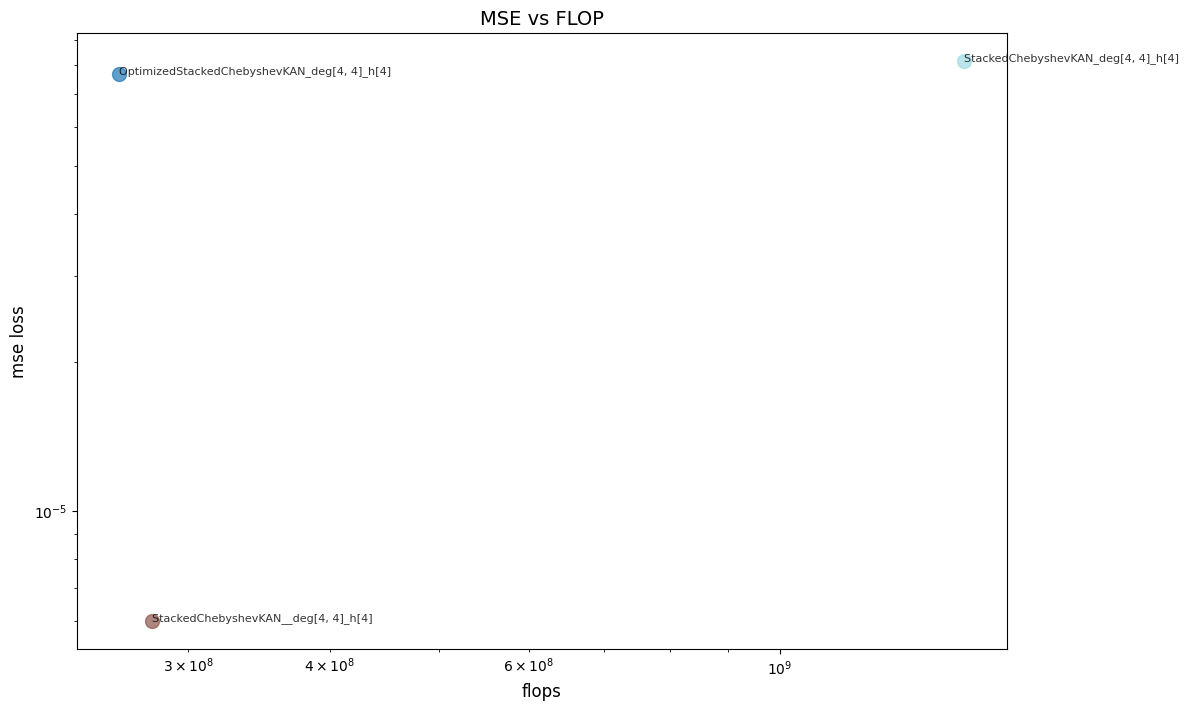

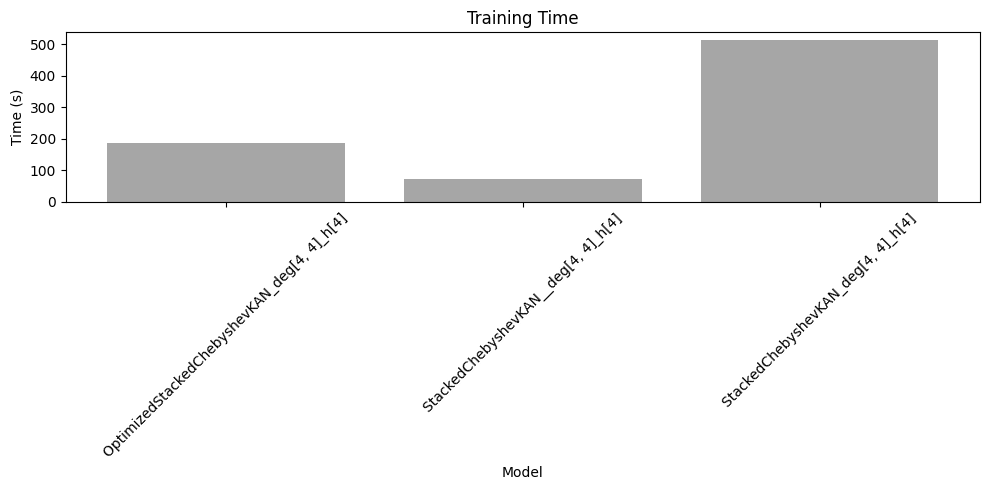

In [9]:
analyser.plot_mse_over_flops(filter=lambda x: x in l1)
analyser.plot_training_times(filter=lambda x: x in l1)

<Figure size 700x700 with 0 Axes>

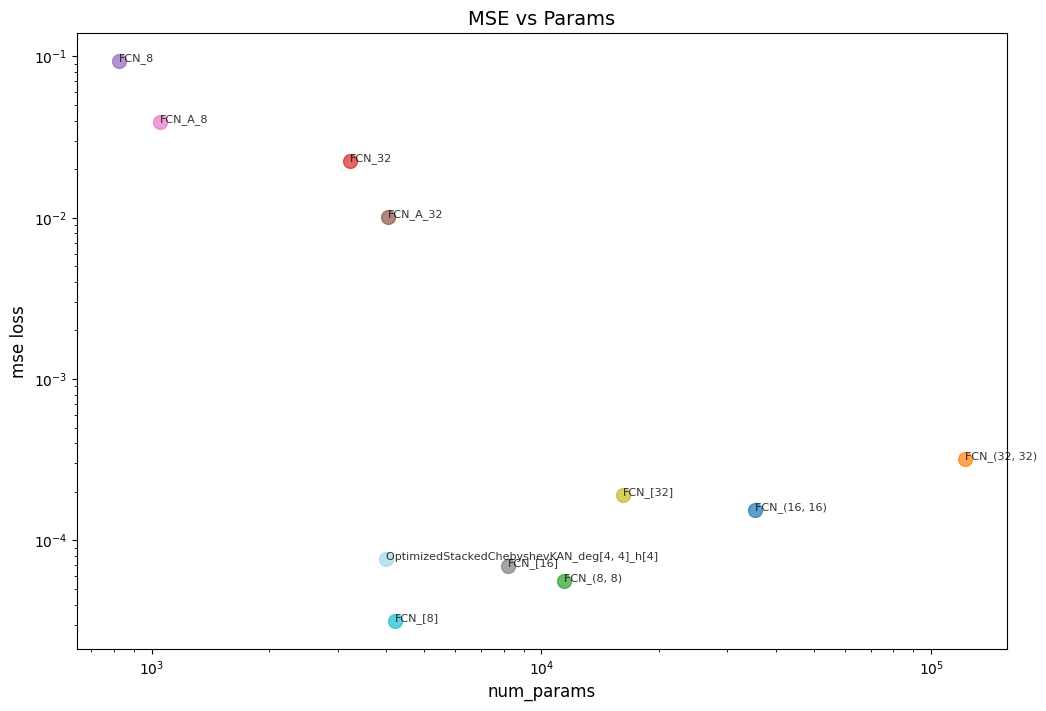

In [10]:
analyser.plot_mse_over_params(filter=lambda x: 'Optimized' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

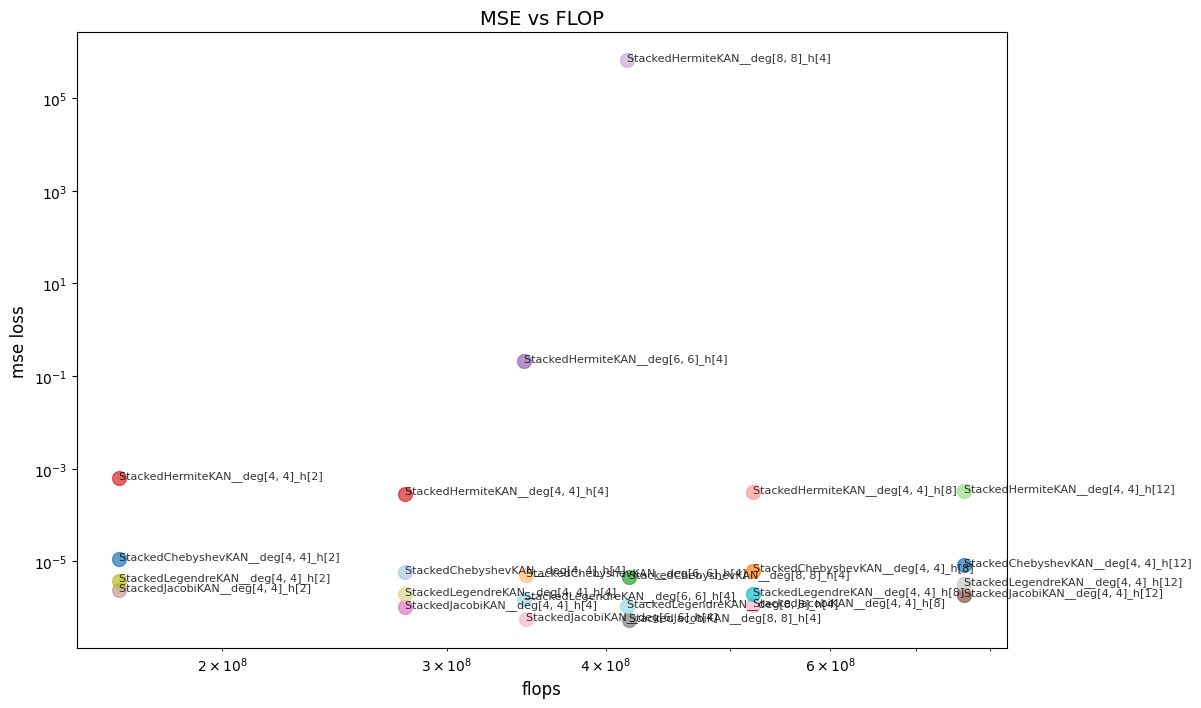

In [11]:
analyser.plot_mse_over_flops(filter=lambda x: '__' in x)

<>:2: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_857054/2839037848.py:2: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x))


<Figure size 700x700 with 0 Axes>

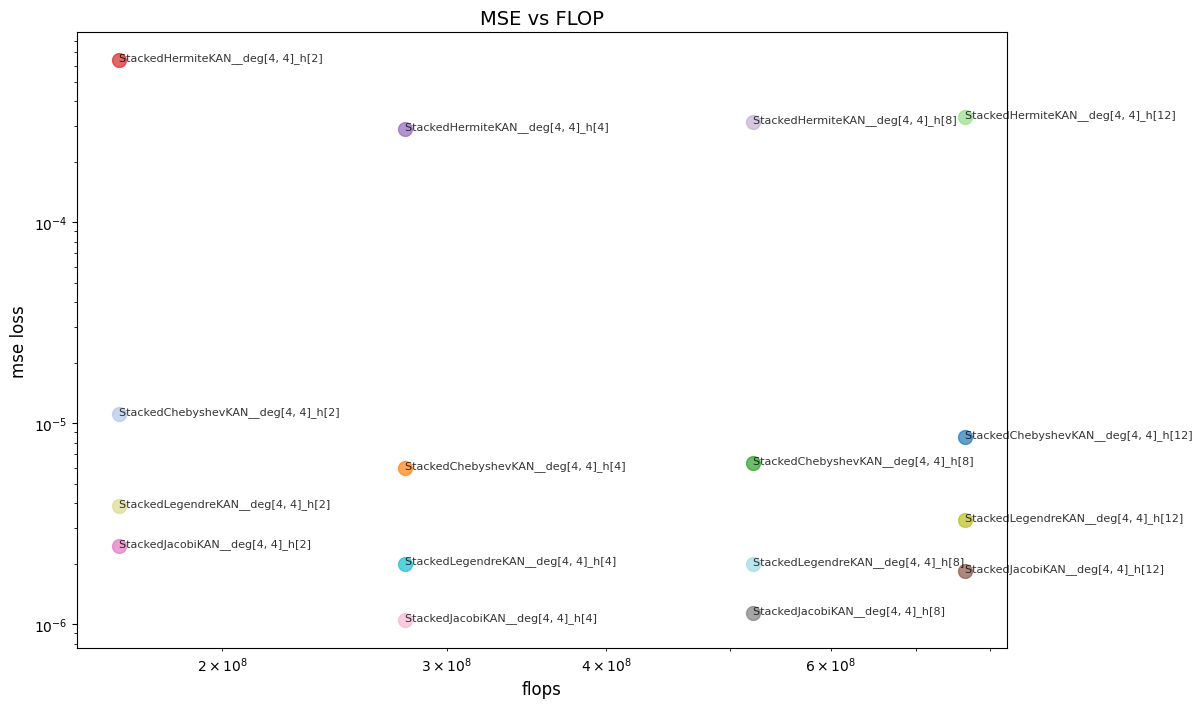

In [12]:
import re
analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x))

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_857054/67745182.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[[0-9]*, [0-9]*]_h\[4]', x))


<Figure size 700x700 with 0 Axes>

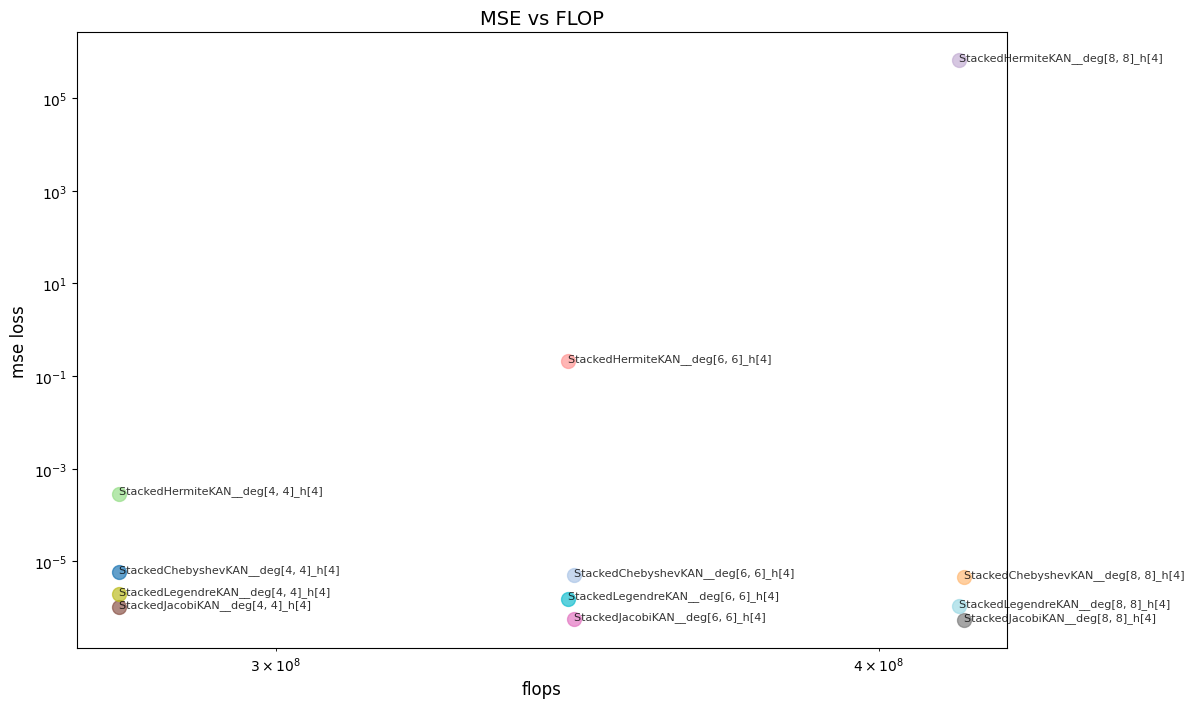

In [13]:
analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[[0-9]*, [0-9]*]_h\[4]', x))

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_857054/2459366313.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mses(filter=lambda x: re.match('[a-zA-Z]*__deg\[8, 8]_h\[4]', x))


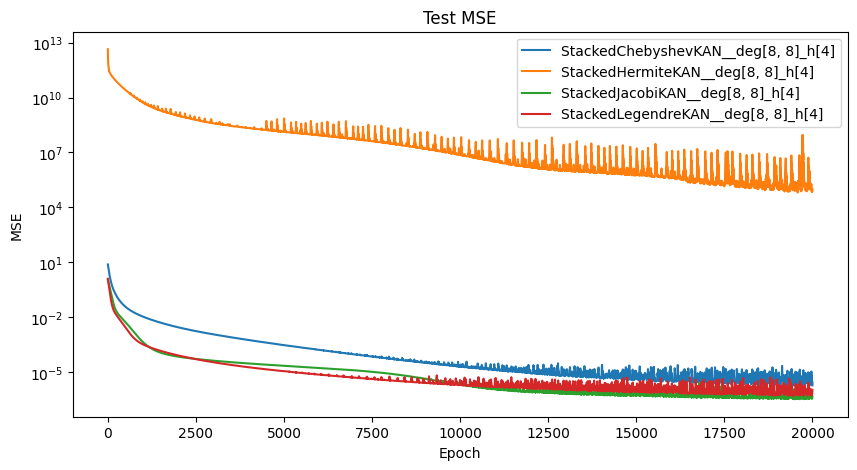

In [14]:
analyser.plot_mses(filter=lambda x: re.match('[a-zA-Z]*__deg\[8, 8]_h\[4]', x))

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_857054/522361176.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mses(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x))


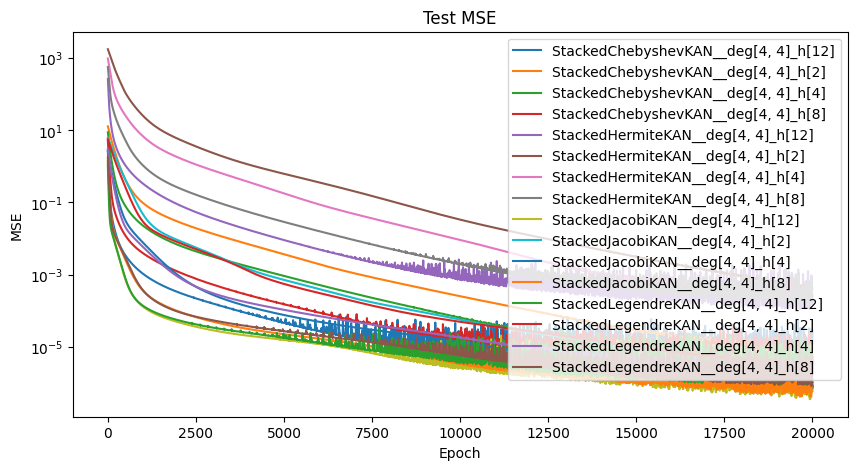

In [15]:
analyser.plot_mses(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x))

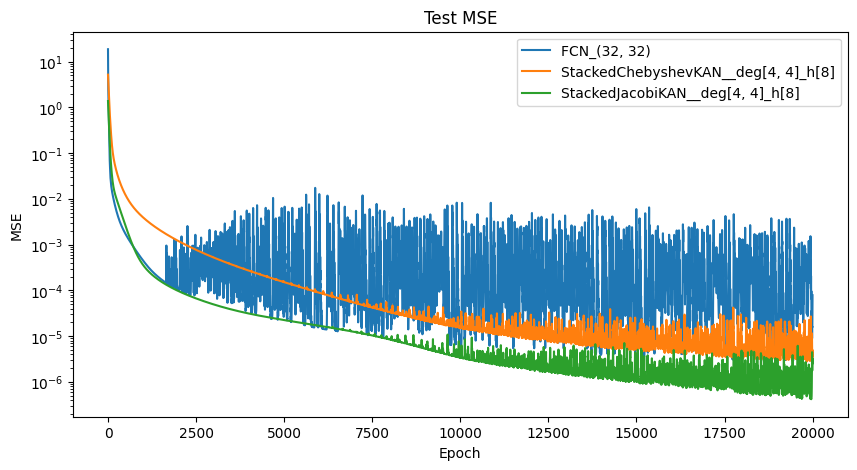

In [16]:
l1 = [
    'StackedJacobiKAN__deg[4, 4]_h[8]',
    'StackedChebyshevKAN__deg[4, 4]_h[8]',
    'FCN_(32, 32)'
]
analyser.plot_mses(filter=lambda x: x in l1)

In [17]:
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedChebyshevKAN__deg[4, 4]_h[8]/test_0_20000.npy', 'rb') as f:
    pred_ckan = np.load(f).reshape(200, 50, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_(32, 32)/test_0_20000.npy', 'rb') as f:
    pred_fcn = np.load(f).reshape(200, 50, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[8]/test_0_20000.npy', 'rb') as f:
    pred_jkan = np.load(f).reshape(200, 50, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[8]/test_exact_0.npy', 'rb') as f:
    exact = np.load(f).reshape(200, 50, -1)

exact.shape, pred_ckan.shape, pred_fcn.shape

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))


<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:9: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_857054/3645346542.py:5: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[[0-9]*, [0-9]*]_h\[4]', x), noshow=True)
/tmp/ipykernel_857054/3645346542.py:9: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x), noshow=True)


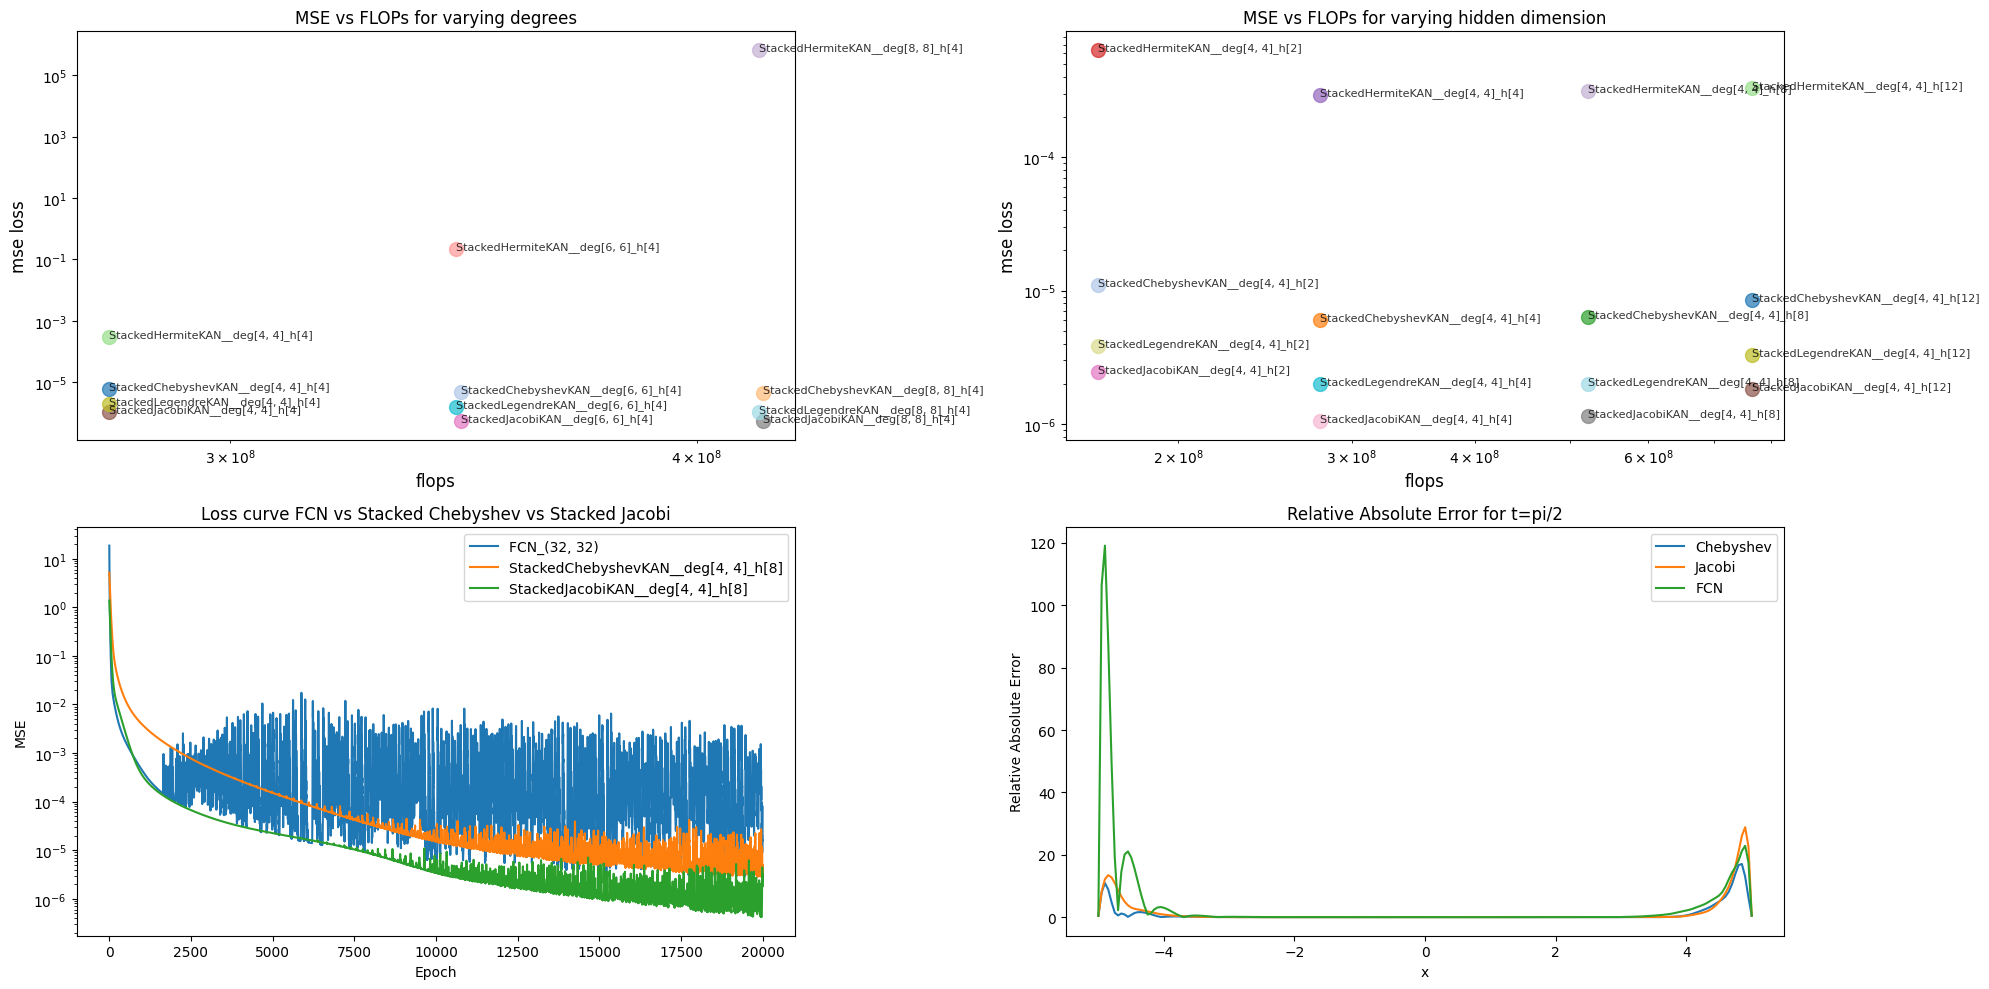

In [18]:
slice=0

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[[0-9]*, [0-9]*]_h\[4]', x), noshow=True)
plt.title('MSE vs FLOPs for varying degrees')

plt.subplot(2, 2, 2)
analyser.plot_mse_over_flops(filter=lambda x: re.match('[a-zA-Z]*__deg\[4, 4]_h\[[0-9]*]', x), noshow=True)
plt.title('MSE vs FLOPs for varying hidden dimension')

plt.subplot(2, 2, 3)
analyser.plot_mses(filter=lambda x: x in l1, noshow=True)
plt.title('Loss curve FCN vs Stacked Chebyshev vs Stacked Jacobi')

# rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))
# re_ckan = rE(exact[1:199, 1:49, slice], pred_ckan[1:199, 1:49, slice])
# re_fcn = rE(exact[1:199, 1:49, slice], pred_fcn[1:199, 1:49, slice])
# re_jkan = rE(exact[1:199, 1:49, slice], pred_jkan[1:199, 1:49, slice])
# plt.hist(re_ckan.flatten(), bins=300, label='CKAN', range=(-500, 500))
# plt.hist(re_fcn.flatten(), bins=300, label='FCN', alpha=0.7, range=(-500, 500))
# plt.hist(re_jkan.flatten(), bins=300, label='Jacobi KAN', alpha=0.4, range=(-500, 500))
plt.subplot(2, 2, 4)
xs = np.linspace(-5, 5, 200)
plt.plot(xs, rae(exact[:, 25, slice], pred_ckan[:, 25, slice]), label='Chebyshev')
plt.plot(xs, rae(exact[:, 25, slice], pred_jkan[:, 25, slice]), label='Jacobi')
plt.plot(xs, rae(exact[:, 25, slice], pred_fcn[:, 25, slice]), label='FCN')
plt.legend()
# plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Relative Absolute Error')
plt.title('Relative Absolute Error for t=pi/2')

plt.tight_layout()
plt.show()

<Figure size 700x700 with 0 Axes>

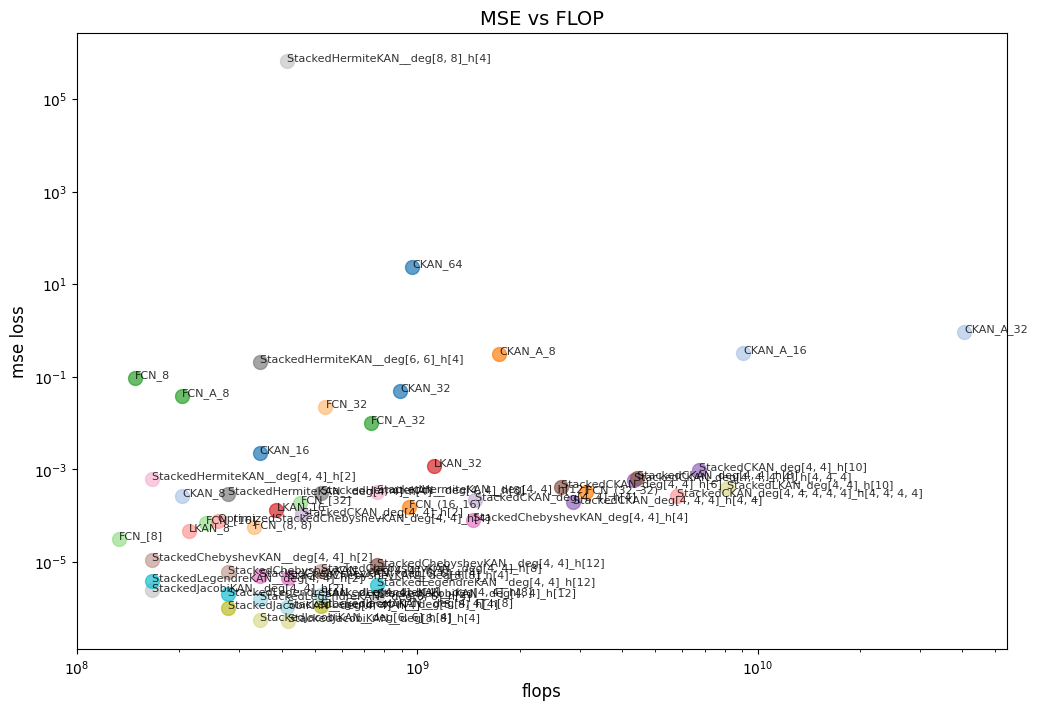

In [19]:
analyser.plot_mse_over_flops()